In [1]:
import numpy as np
import pyvista as pv
from pyvista.plotting.plotter import Plotter
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
sys.path.append(rf"D:\code\pywfn")
from pywfn.base import Mol
from pywfn.reader import LogReader
from pywfn.atomprop import activity
from pywfn.bondprop import piDM,bondOrder
from pywfn.maths import points_rotate
from pywfn.data.elements import elements
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
from pywfn.utils import printer
printer.ifShell=False

In [2]:
root=rf"D:\BaiduSyncdisk\Articles\HFV\gfile\CR3自由基\wfn"
names=['Ccl3','CF3','CH3','CMe3']
charges=['-','0','+']
valence=np.zeros(shape=(len(names),3))
for n,name in enumerate(names):
    for c,charge in enumerate(charges):
        path=f'{root}/{name}_wfn{charge}.log'
        mol=Mol(LogReader(path))
        
        caler=activity.Calculator()
        caler.mols=[mol]
        result=caler.freeValence(1)[0,-1]
        valence[n,c]=result

In [3]:
def show_result(datas,title:str='fig'):
    idxs=np.arange(len(datas))
    ve=datas[:,0]
    v0=datas[:,1]
    vn=datas[:,2]
    # vals=np.abs(np.vstack([ve-v0,vn-v0])).max(axis=0)
    idxs=np.argsort(v0)
    datas=datas[idxs,:]
    cs=['#339af0','#868e96','#fa5252']
    labels=['-1','0','+1']
    xs=[]
    total=len(names)+1
    for i in range(len(names)):
        for j in range(3):
            x=i*total+j
            h=datas[i,j]
            # print(i,j,x)
            if j==1:
                xs.append(x)
            if i==0:
                plt.bar(x,h,color=cs[j],label=labels[j])
            else:
                plt.bar(x,h,color=cs[j])

    plt.xticks(xs,[names[i] for i in idxs])
    plt.ylabel('Free Valence')
    plt.legend()
    # plt.ylim(0,2.8)
    plt.savefig(fr'图像/{title}.png',dpi=300,bbox_inches='tight')
    plt.show()

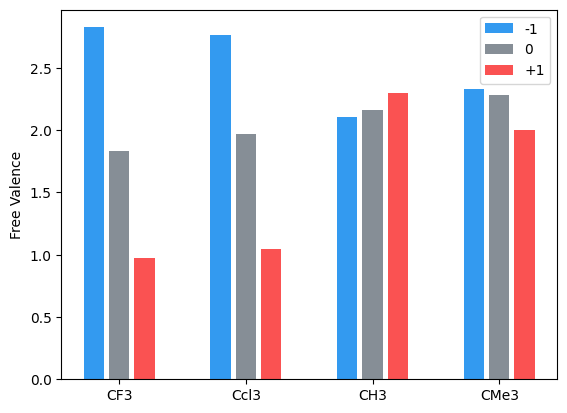

In [4]:
show_result(valence,title='CR3自由基')

In [31]:
valence[:,1]-valence[:,0],valence[:,1]-valence[:,2]

(array([-0.1707, -0.2954,  0.1148,  0.3842,  0.1647]),
 array([ 0.7467,  0.7367, -0.1682,  0.1252,  0.1488]))

In [17]:
from pywfn.atomprop import charge
datas=np.zeros(shape=(5,3))
for n,name in enumerate(names):
    for c,chrg in enumerate(charges):
        path=f'{root}/{name}_wfn{chrg}.log'
        mol=Mol(LogReader(path))
        
        caler=charge.Calculator(mol)
        result=caler.hirshfeld()[0]
        datas[n,c]=result

In [19]:
datas[:,1]-datas[:,0],datas[:,2]-datas[:,1]

(array([0.277 , 0.449 , 0.5619, 0.2659, 0.1195]),
 array([0.1893, 0.3679, 0.5786, 0.2648, 0.1047]))

In [ ]:
cs=['#339af0','#868e96','#fa5252']
labels=['-1','0','+1']
xs=[]
for i in range(5):
    for j in range(3):
        x=i*5+j
        h=datas[i,j]
        if j==1:
            xs.append(x)
        if i==0:
            plt.bar(x,h,color=cs[j],label=labels[j])
        else:
            plt.bar(x,h,color=cs[j])
plt.xticks(xs,names)
plt.ylabel('Free Valence')
plt.legend()
# plt.ylim(0,2.8)
plt.show()